<a href="https://colab.research.google.com/github/larauzv1/WitnessEmail/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
## KIRBY DATA RELATED QUESTIONS
#read kirb21 data into dataframe
kirb21_df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")


In [3]:
# new pandas dataframe
# .loc selects from kirb21_df rows with only rawids equal to kirby906a_ax.img
# .copy creates a copy of selected data

kirby906a_ax_df = kirb21_df.loc[(kirb21_df['rawid']== "kirby906a_ax.img")].copy()
kirby906a_ax_df

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
12540,12541,kirby906a_ax.img,Telencephalon_L,467063,2.0,350.0,165.2599,57.1707,1,1,906,1195015,1123076
12541,12542,kirby906a_ax.img,Telencephalon_R,470488,2.0,337.0,171.8695,59.3001,1,1,906,1195015,1123076
12542,12543,kirby906a_ax.img,Diencephalon_L,8801,60.0,327.0,227.1878,31.2303,1,1,906,1195015,1123076
12543,12544,kirby906a_ax.img,Diencephalon_R,9054,63.0,415.0,231.6770,31.1780,1,1,906,1195015,1123076
12544,12545,kirby906a_ax.img,Mesencephalon,9564,86.0,352.0,269.1003,28.6454,1,1,906,1195015,1123076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13371,13372,kirby906a_ax.img,Caudate_tail_L,424,112.0,279.0,182.8215,31.9975,2,5,906,1195015,1123076
13372,13373,kirby906a_ax.img,Caudate_tail_R,386,83.0,286.0,186.3707,37.6639,2,5,906,1195015,1123076
13373,13374,kirby906a_ax.img,Chroid_LVetc_L,101,56.0,255.0,181.6190,39.8132,2,5,906,1195015,1123076
13374,13375,kirby906a_ax.img,Chroid_LVetc_R,84,53.0,271.0,181.9857,43.3901,2,5,906,1195015,1123076


In [4]:
## Calculationing Type 1 Level 1 L/R Telencephalon volume, ICV fraction, and TBV fraction

# .loc extracts the data based on the labels arrounding to what the roi is and then specifies that we want the volume column from those rows
# .iloc[0] selects the 1st element as a value from the series created which is alright bc there's only one row that we expect to meet the conditions

# create variable that the extracted left telencephalon is assigned to
telencephalon_L_volume = kirby906a_ax_df.loc[kirby906a_ax_df['roi']== 'Telencephalon_L', 'volume'].iloc[0]

# create variable that the extracted right telencephalon is assigned to
telencephalon_R_volume = kirby906a_ax_df.loc[kirby906a_ax_df['roi']== 'Telencephalon_R', 'volume'].iloc[0]

#print results of telencephalon left and right side volume as numerical values
print(telencephalon_L_volume)
print(telencephalon_R_volume)

# isolate/define ICV value to put in denominator
# ICV is constant throughout so probably could've just said ICV = 1195015 but the below code extracts the ICV value from the row with Telencephalon_L
# it specifies that it wants to the values from the 'icv' column using .loc()
# .iloc(0) selects the first element value of that series
ICV = kirby906a_ax_df.loc[kirby906a_ax_df['roi']== 'Telencephalon_L', 'icv'].iloc[0]

#Calculates ICV fraction by dividing sum of telencephalon volume by ICV value defined above
ICV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / ICV

#print ICV fraction value
print(ICV_fraction)

# isolate/define TBV value to put in denominator which is constant throughout kirby906a_ax_df
# so I used .loc to select row with telecephalon_L and column 'tbv' labels
# .iloc[0] was used to assign the first element value to the variable TBV which will be used in later calculation
TBV = kirby906a_ax_df.loc[kirby906a_ax_df['roi']== 'Telencephalon_L', 'tbv'].iloc[0]

#calculate TBV fraction by dividing sum of of telencephalon volume by TBV value defined above
TBV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / TBV

#print TBV fraction value
print(TBV_fraction)


467063
470488
0.7845516583473847
0.8348063710737297


In [5]:
## creating a dataframe with sum of all regions for each type and level

# .groupby() Groups the data by type and level then selects the volume column for each group
# .sum() calculates sum of 'volume' values in each group and .copy() creates a copy of this dataset to avoid modifying kirby906a_ax_df
all_regions_df = kirby906a_ax_df.groupby(['type', 'level'])['volume'].sum().copy()

# creates a new default numerical index instead of using type and level as the index
all_regions_df = all_regions_df.reset_index()

# rename volume column in the all_regions_df to 'total_volume'
all_regions_df = all_regions_df.rename(columns = {'volume': 'total_volume'})

# shows whole all regions data frame with new index column
all_regions_df

# prints all_regions_df dataframe without index column
# print(all_regions_df.to_string(index=False))

,type,level,total_volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124
5,2,1,1195015
6,2,2,1195022
7,2,3,1195032
8,2,4,1195041
9,2,5,1195092


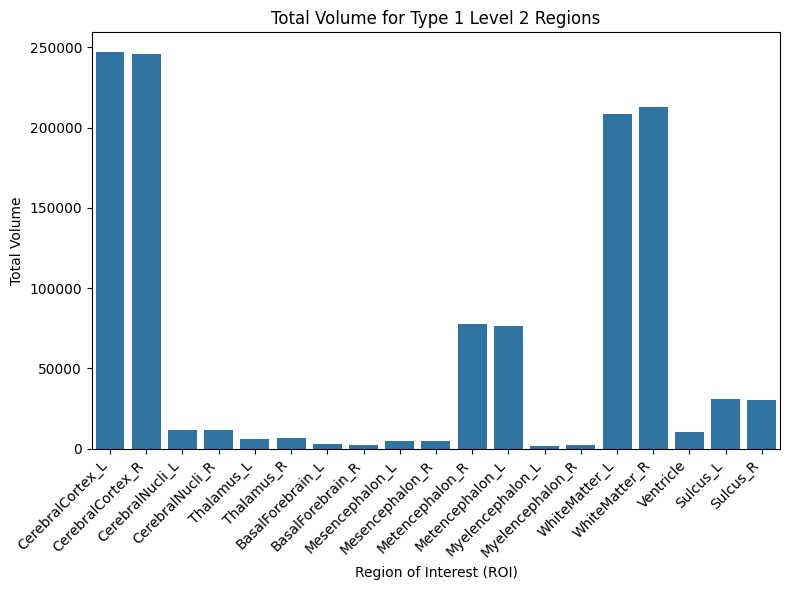

In [6]:
## create bar plot of Type 1 Level 2 data using seaborn

# Filter for Type 1 Level 2 data
type1_level2_df = kirby906a_ax_df[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 2)]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='roi', y='volume', data=type1_level2_df)
plt.title('Total Volume for Type 1 Level 2 Regions')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Total Volume')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


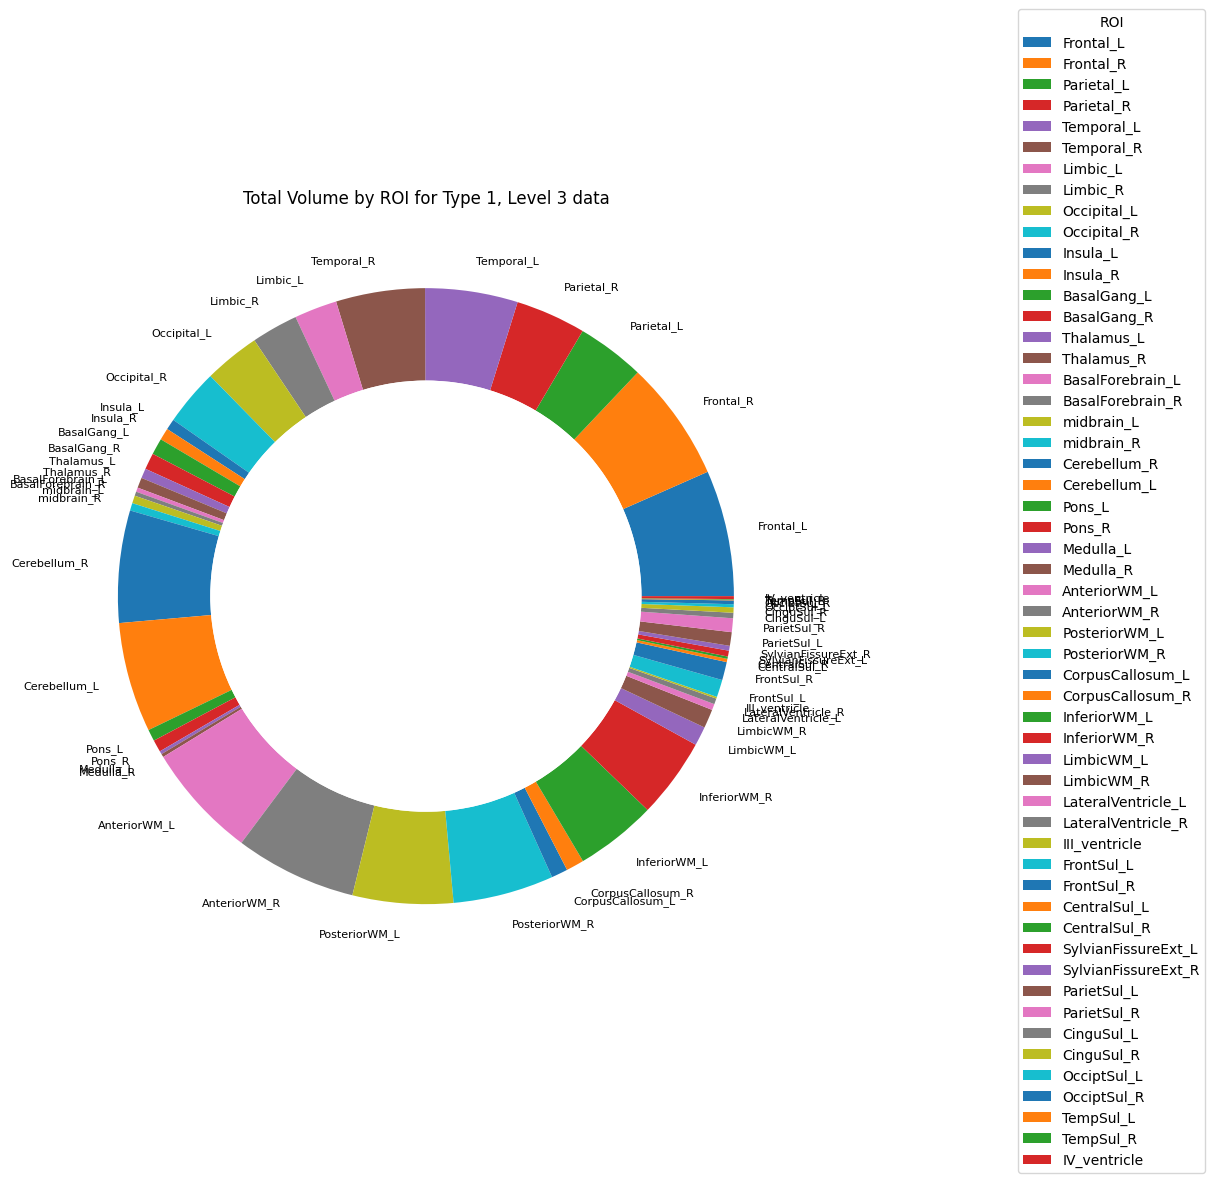

In [7]:
## Create donut chart in matplotlib of Type 1 Level 3 ROI data

# create dataframe with only type 1 level 3 data
type1_level3_df = kirby906a_ax_df[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 3)]

# create donut chart
# starts a figure w axis
fig, ax = plt.subplots(figsize=(12,10)) #figsize adjusts canvas size
# creates pie chart and provides which data values will be used from df; wedgeprops defines width of wedge
wedges, texts = ax.pie(type1_level3_df['volume'].values, labels=type1_level3_df['roi'].values, wedgeprops=dict(width=0.3), textprops={'fontsize':8}) #textprops changes font size of labels
centre_circle = plt.Circle((0, 0), 0.70, fc='white') #creates a white circle to cover piechart's center
fig.gca().add_artist(centre_circle) # adds circle to plot

# sets title
ax.set_title('Total Volume by ROI for Type 1, Level 3 data')

#creates legend; bbox_to_anchor is to position legend and bbox_transform uses figure coordinates to place legend relative to figure
ax.legend(wedges, type1_level3_df['roi'].values, title="ROI", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), bbox_transform=fig.transFigure)

#show donut chart
plt.show()


In [8]:
## CLASS INTEREST DATA PROBLEM

# read in class data
class_interests_df = pd.read_table("https://raw.githubusercontent.com/bcaffo/ds4ph-bme/refs/heads/master/data/classInterests.txt")
class_interests_df

,Year,Program
0,Master's,BME
1,Master's,BME
2,Senior,BME
3,PhD,BME
4,PhD,Computer_Science
5,Master's,BME
6,Master's,BME
7,Master's,BME
8,Master's,BME
9,Master's,BME


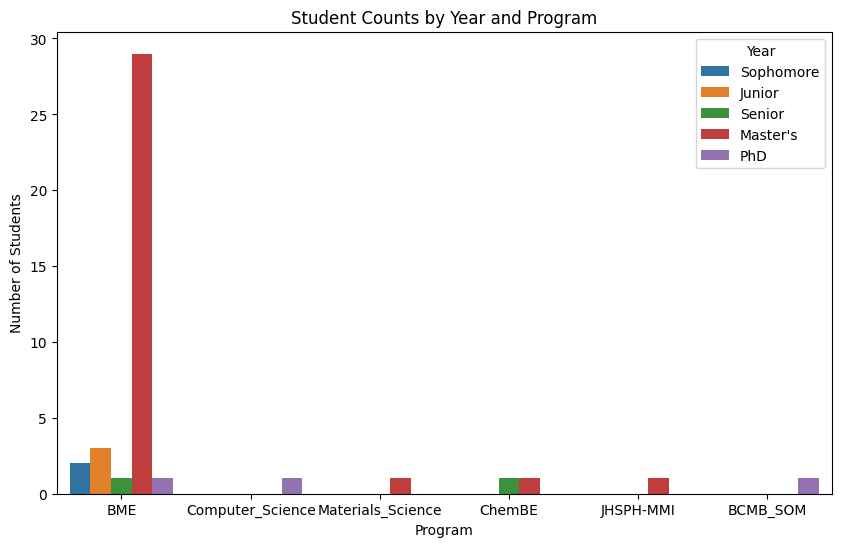

In [9]:
## Create bar plot of student counts by year and program using seaborn

# Defining a specific order I want my data in for my legend
year_order = ['Sophomore', 'Junior', 'Senior', 'Master\'s', 'PhD']

# creates new figure for plot with figsize setting the size of it
plt.figure(figsize=(10, 6))
sns.countplot(x='Program', hue='Year', data=class_interests_df, hue_order = year_order) # creates bar plot using counts; hue divides data by year and hue_order orders it according to year_order above
plt.title('Student Counts by Year and Program') # sets title
plt.xlabel('Program') # set x axis label
plt.ylabel('Number of Students') #set y axis label
plt.show() # show plot


In [10]:
## GENE EXPRESSION DATASET HW PROBLEMS

# read in gene expression data
gene_expression_df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv')
gene_expression_df

,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1,1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
2,117_at,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
3,121_at,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864
4,1255_g_at,3.597872,3.108801,3.128269,3.364947,3.125909,3.186834,3.311022,3.092042,3.167737,...,3.331424,3.043856,3.151900,3.132253,3.250600,2.984125,3.152269,3.225123,3.222731,3.175846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,AFFX-r2-Ec-bioC-5_at,7.403732,8.173182,7.973033,6.993441,6.699585,6.926527,7.637367,7.006133,7.495841,...,6.542924,6.701961,5.589173,6.999664,7.852193,7.728074,8.243135,6.597565,8.454131,6.635873
8789,AFFX-r2-Ec-bioD-3_at,9.499829,10.147961,11.527503,10.814206,10.629492,10.702125,11.285036,11.055667,11.388749,...,11.160386,11.321130,10.944250,11.098619,10.065078,10.222762,10.265151,11.160541,10.333127,10.762506
8790,AFFX-r2-Ec-bioD-5_at,9.087917,9.356494,11.116875,10.056376,10.344678,10.186448,10.663689,10.411306,10.761674,...,10.669841,10.725765,9.989154,10.428633,9.288700,9.378446,9.569521,10.421423,9.766366,10.108590
8791,AFFX-r2-P1-cre-3_at,10.499176,11.039103,2.721370,2.734304,5.357892,2.798261,2.802282,2.674753,2.881834,...,2.774188,5.756867,4.570855,2.633058,10.544423,10.714675,10.901787,2.535893,10.903407,2.813128


In [11]:
## Create matrix with rowmean subtracted from each row

# Convert all columns except the first to numeric
# forces errors to be represented as NaNs
gene_expression_df_numeric = gene_expression_df.apply(pd.to_numeric, errors='coerce').iloc[:, 1:]

# calculate the row mean on the numeric data
rowmean = gene_expression_df_numeric.mean(axis=1)

# Subtract row mean from all rows of the original df
gene_expression_df_pt1 = gene_expression_df.iloc[:, 1:].sub(rowmean, axis=0) #skip first column
gene_expression_df_pt1 = pd.concat([gene_expression_df.iloc[:,0], gene_expression_df_pt1], axis=1) #add first column back

gene_expression_df_pt1

,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,-0.049313,-0.647073,-0.226509,0.129747,-0.322250,0.123230,0.480163,-0.013618,0.263058,...,0.699373,-0.067397,0.626902,0.076844,-0.260908,-0.052949,0.243751,-0.250195,0.036180,0.105316
1,1053_at,0.163992,0.308363,0.400337,-0.085507,0.159365,-0.009050,-0.249394,-0.043143,-0.049269,...,-0.491913,0.321100,0.182799,-0.162988,0.077152,0.144017,-0.152446,0.189150,-0.739855,0.425779
2,117_at,0.283074,-0.651863,-0.437645,-0.062873,-0.271335,-0.176954,-0.377696,-0.320573,0.259077,...,0.754425,-0.236315,-0.201970,0.282794,-0.067313,0.014905,-0.363462,-0.075156,0.060573,-0.229842
3,121_at,-0.648591,-0.558832,-0.040375,0.375740,-0.360718,0.422774,0.518462,-0.149425,-0.051720,...,0.631054,0.093552,0.339583,-0.364641,-0.151704,-0.798867,0.249820,0.023419,-0.281107,-0.252178
4,1255_g_at,0.400185,-0.088886,-0.069418,0.167261,-0.071777,-0.010852,0.113335,-0.105644,-0.029949,...,0.133737,-0.153830,-0.045787,-0.065434,0.052913,-0.213562,-0.045417,0.027436,0.025044,-0.021841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,AFFX-r2-Ec-bioC-5_at,0.272703,1.042153,0.842004,-0.137588,-0.431444,-0.204502,0.506338,-0.124896,0.364811,...,-0.588105,-0.429068,-1.541857,-0.131365,0.721164,0.597045,1.112106,-0.533464,1.323102,-0.495156
8789,AFFX-r2-Ec-bioD-3_at,-1.086185,-0.438053,0.941489,0.228192,0.043478,0.116111,0.699022,0.469653,0.802735,...,0.574372,0.735116,0.358236,0.512605,-0.520936,-0.363252,-0.320863,0.574527,-0.252887,0.176492
8790,AFFX-r2-Ec-bioD-5_at,-0.894001,-0.625424,1.134957,0.074458,0.362761,0.204530,0.681772,0.429388,0.779757,...,0.687923,0.743847,0.007236,0.446716,-0.693218,-0.603472,-0.412396,0.439506,-0.215551,0.126673
8791,AFFX-r2-P1-cre-3_at,4.832515,5.372443,-2.945291,-2.932357,-0.308769,-2.868399,-2.864378,-2.991908,-2.784827,...,-2.892473,0.090207,-1.095805,-3.033603,4.877762,5.048014,5.235127,-3.130768,5.236746,-2.853533


In [12]:
## Create matrix with column mean subtracted from each column

# Convert all columns except the first to numeric
# forces errors to be represented as NaNs
gene_expression_df_numeric_col = gene_expression_df_pt1.apply(pd.to_numeric, errors='coerce').iloc[:, 1:]

# compute column mean
columnmean = gene_expression_df_numeric_col.mean()

# subtract column mean from each column
gene_expression_df_pt2 = gene_expression_df_pt1.iloc[:,1:].sub(columnmean, axis=1)
gene_expression_df_pt2 = pd.concat([gene_expression_df_pt1.iloc[:,0], gene_expression_df_pt2], axis=1) #add first column back
gene_expression_df_pt2


,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,-0.024490,-0.640032,-0.223988,0.114936,-0.428929,0.109485,0.457383,-0.017008,0.250137,...,0.678049,-0.061456,0.665913,0.076758,-0.251423,-0.031388,0.235241,-0.261128,0.041275,0.090015
1,1053_at,0.188815,0.315404,0.402858,-0.100318,0.052687,-0.022794,-0.272174,-0.046533,-0.062190,...,-0.513237,0.327042,0.221810,-0.163074,0.086637,0.165579,-0.160956,0.178217,-0.734760,0.410478
2,117_at,0.307897,-0.644822,-0.435124,-0.077684,-0.378014,-0.190699,-0.400475,-0.323963,0.246157,...,0.733100,-0.230374,-0.162959,0.282708,-0.057828,0.036467,-0.371972,-0.086090,0.065668,-0.245143
3,121_at,-0.623768,-0.551790,-0.037853,0.360928,-0.467397,0.409030,0.495682,-0.152814,-0.064641,...,0.609730,0.099493,0.378593,-0.364727,-0.142219,-0.777306,0.241310,0.012486,-0.276012,-0.267479
4,1255_g_at,0.425008,-0.081844,-0.066896,0.152450,-0.178456,-0.024597,0.090556,-0.109034,-0.042870,...,0.112413,-0.147889,-0.006776,-0.065520,0.062398,-0.192001,-0.053927,0.016503,0.030139,-0.037142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,AFFX-r2-Ec-bioC-5_at,0.297526,1.049194,0.844525,-0.152399,-0.538123,-0.218246,0.483558,-0.128286,0.351891,...,-0.609429,-0.423127,-1.502846,-0.131451,0.730648,0.618607,1.103596,-0.544398,1.328197,-0.510458
8789,AFFX-r2-Ec-bioD-3_at,-1.061362,-0.431011,0.944010,0.213381,-0.063201,0.102366,0.676242,0.466263,0.789815,...,0.553047,0.741058,0.397247,0.512519,-0.511451,-0.341690,-0.329373,0.563594,-0.247792,0.161191
8790,AFFX-r2-Ec-bioD-5_at,-0.869178,-0.618382,1.137478,0.059647,0.256082,0.190786,0.658992,0.425998,0.766836,...,0.666599,0.749789,0.046247,0.446630,-0.683733,-0.581910,-0.420906,0.428572,-0.210456,0.111371
8791,AFFX-r2-P1-cre-3_at,4.857338,5.379484,-2.942770,-2.947168,-0.415447,-2.882144,-2.887158,-2.995298,-2.797747,...,-2.913797,0.096148,-1.056795,-3.033689,4.887247,5.069575,5.226617,-3.141702,5.241841,-2.868834


In [13]:
## Create matrix where columns are divided by column standard deviation

# Convert all columns except the first to numeric
# forces errors to be represented as NaNs
gene_expression_df_numeric_stdcol = gene_expression_df_pt2.apply(pd.to_numeric, errors='coerce').iloc[:, 1:]

# compute standard deviation of each column; by default it is set to calculate std column-wise
columnstd = gene_expression_df_numeric_stdcol.std()

# divide each column by its standard deviation
gene_expression_df_pt3 = gene_expression_df_pt2.iloc[:,1:].div(columnstd, axis=1) #axis = 1 is so that it is divided by its own std and doesn't return NaN
gene_expression_df_pt3 = pd.concat([gene_expression_df_pt2.iloc[:,0], gene_expression_df_pt3], axis=1) #add first column back
gene_expression_df_pt3

,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,-0.062810,-1.694428,-0.797346,0.362538,-1.152413,0.366177,1.252187,-0.054154,1.008166,...,1.446603,-0.185273,1.615970,0.245537,-0.568262,-0.069236,0.617954,-0.598607,0.088393,0.257410
1,1053_at,0.484259,0.835005,1.434085,-0.316432,0.141554,-0.076237,-0.745136,-0.148166,-0.250652,...,-1.094982,0.985940,0.538265,-0.521649,0.195814,0.365237,-0.422815,0.408542,-1.573530,1.173822
2,117_at,0.789673,-1.707110,-1.548943,-0.245036,-1.015618,-0.637799,-1.096388,-1.031533,0.992122,...,1.564055,-0.694512,-0.395453,0.904341,-0.130702,0.080440,-0.977132,-0.197351,0.140632,-0.701024
3,121_at,-1.599798,-1.460817,-0.134750,1.138467,-1.255766,1.368016,1.357039,-0.486577,-0.260531,...,1.300847,0.299944,0.918732,-1.166704,-0.321440,-1.714599,0.633897,0.028623,-0.591095,-0.764897
4,1255_g_at,1.090032,-0.216675,-0.238137,0.480868,-0.479461,-0.082265,0.247916,-0.347177,-0.172784,...,0.239831,-0.445844,-0.016443,-0.209588,0.141031,-0.423519,-0.141661,0.037831,0.064544,-0.106213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,AFFX-r2-Ec-bioC-5_at,0.763075,2.777651,3.006323,-0.480709,-1.445787,-0.729933,1.323845,-0.408476,1.418280,...,-1.300205,-1.275609,-3.646955,-0.420492,1.651396,1.364537,2.899034,-1.247970,2.844410,-1.459729
8789,AFFX-r2-Ec-bioD-3_at,-2.722110,-1.141065,3.360467,0.673063,-0.169803,0.342368,1.851361,1.484632,3.183311,...,1.179916,2.234082,0.963998,1.639471,-1.155970,-0.753708,-0.865229,1.291974,-0.530662,0.460950
8790,AFFX-r2-Ec-bioD-5_at,-2.229208,-1.637114,4.049170,0.188144,0.688022,0.638090,1.804134,1.356425,3.090696,...,1.422176,2.260404,0.112226,1.428700,-1.545359,-1.283592,-1.105678,0.982453,-0.450704,0.318483
8791,AFFX-r2-P1-cre-3_at,12.457774,14.241719,-10.475605,-9.296175,-1.116192,-9.639443,-7.904224,-9.537356,-11.276184,...,-6.216530,0.289860,-2.564523,-9.704306,11.046052,11.182587,13.729787,-7.201991,11.225705,-8.203855


In [14]:
## HEALTHCARE DATASET PROBLEMS

# read data into new healthcare_df
healthcare_df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv', skiprows=list(range(0, 2)) + list(range(54, 70))) #skiprows is used to skip metadata rows and ending data rows that are filled with NaN values
healthcare_df = healthcare_df.rename(columns = {'1991__Total Health Spending': '1991', '1992__Total Health Spending': '1992', '1993__Total Health Spending': '1993', '1994__Total Health Spending': '1994', '1995__Total Health Spending': '1995', '1996__Total Health Spending': '1996', '1997__Total Health Spending': '1997', '1998__Total Health Spending': '1998', '1999__Total Health Spending': '1999', '2000__Total Health Spending': '2000', '2001__Total Health Spending': '2001', '2002__Total Health Spending': '2002', '2003__Total Health Spending': '2003', '2004__Total Health Spending': '20014', '2005__Total Health Spending': '2005', '2006__Total Health Spending': '2006', '2007__Total Health Spending': '2007', '2008__Total Health Spending': '2008', '2009__Total Health Spending': '2009', '2010__Total Health Spending': '2010', '2011__Total Health Spending': '2011', '2012__Total Health Spending': '2012', '2013__Total Health Spending': '2013', '2014__Total Health Spending': '2014'}) #rename columns to reduce redundancy
healthcare_df

,Location,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,United States,675896,731455,778684,820172,869578,917540,969531,1026103,1086280,...,1696222,1804672,1918820,2010690,2114221,2194625,2272582,2365948,2435624,2562824
1,Alabama,10393,11284,12028,12742,13590,14450,15462,15860,16451,...,25338,26638,27700,28765,30095,30728,31398,32848,33788,35263
2,Alaska,1458,1558,1661,1728,1879,2076,2240,2386,2569,...,4765,5048,5426,5807,6112,6519,6928,7406,7684,8151
3,Arizona,9269,9815,10655,11364,12042,12850,13418,14465,15550,...,28190,30766,33366,35547,37258,38620,39295,40495,41481,43356
4,Arkansas,5632,6022,6397,6810,7343,7817,8393,8814,9407,...,14611,15431,16426,17246,18071,18735,19356,20076,20500,21980
5,California,81438,87949,91963,94245,96870,100215,103681,111224,116036,...,182958,194413,209397,221013,229541,241916,253844,266767,278168,291989
6,Colorado,8460,9215,9803,10382,11153,11863,12572,13790,14764,...,22867,24849,26525,27797,29246,30187,31372,32726,34090,36398
7,Connecticut,10950,11635,12081,12772,13649,14139,14948,15944,16785,...,24538,25997,27488,29141,31132,31727,32129,33421,34223,35413
8,Delaware,1938,2111,2285,2489,2655,2772,3026,3207,3539,...,5899,6285,6735,7191,7495,7938,8365,8650,9038,9587
9,District of Columbia,2800,3098,3240,3255,3285,3362,3374,3461,3578,...,4971,5138,5492,5779,6182,6582,7000,7130,7443,7871


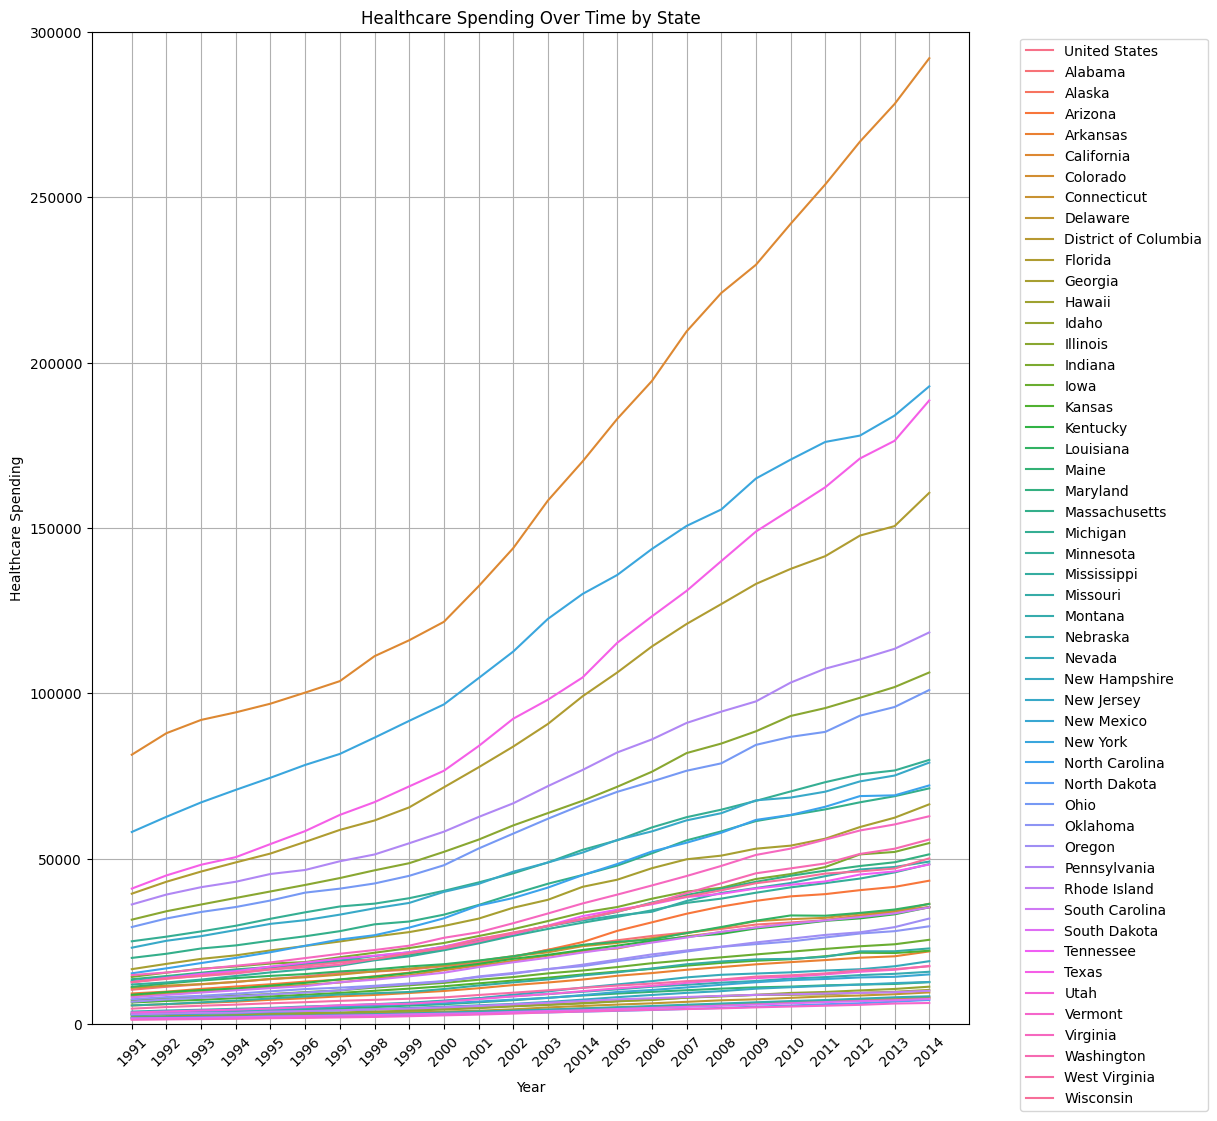

In [15]:
## Create plot of healthcare spending over time color coded by states

plt.figure(figsize=(12, 12))  # intializes figure

# converts columns into rows
healthcare_long = pd.melt(
    healthcare_df,
    id_vars=['Location'],  # Keep 'Location' as the identifier
    var_name='Year',       # New column for year values
    value_name='Spending'   # New column for spending values
)

# generate lineplot  with new column year as the x and spending as the y-axis; hue specifies that i want a different color for each state
sns.lineplot(x='Year', y='Spending', hue='Location', data=healthcare_long)

# Customize the plot
plt.title('Healthcare Spending Over Time by State') # sets title
plt.xlabel('Year') # sets label for x-axis
plt.ylabel('Healthcare Spending') # sets label for y-axis
plt.xticks(rotation=45) # rotates x-axis labels for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #adds legend and uses loc to control position
plt.tight_layout() #prevents overlapping

# Set y-axis limits and ticks
plt.ylim(0, 300000)  # Set the limits
ax = plt.gca() # grabs current axes making it easier to customize the axes
ax.grid() #adds grid lines for clarity
ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))  # Set ticks every 50000

# Show the plot
plt.show()




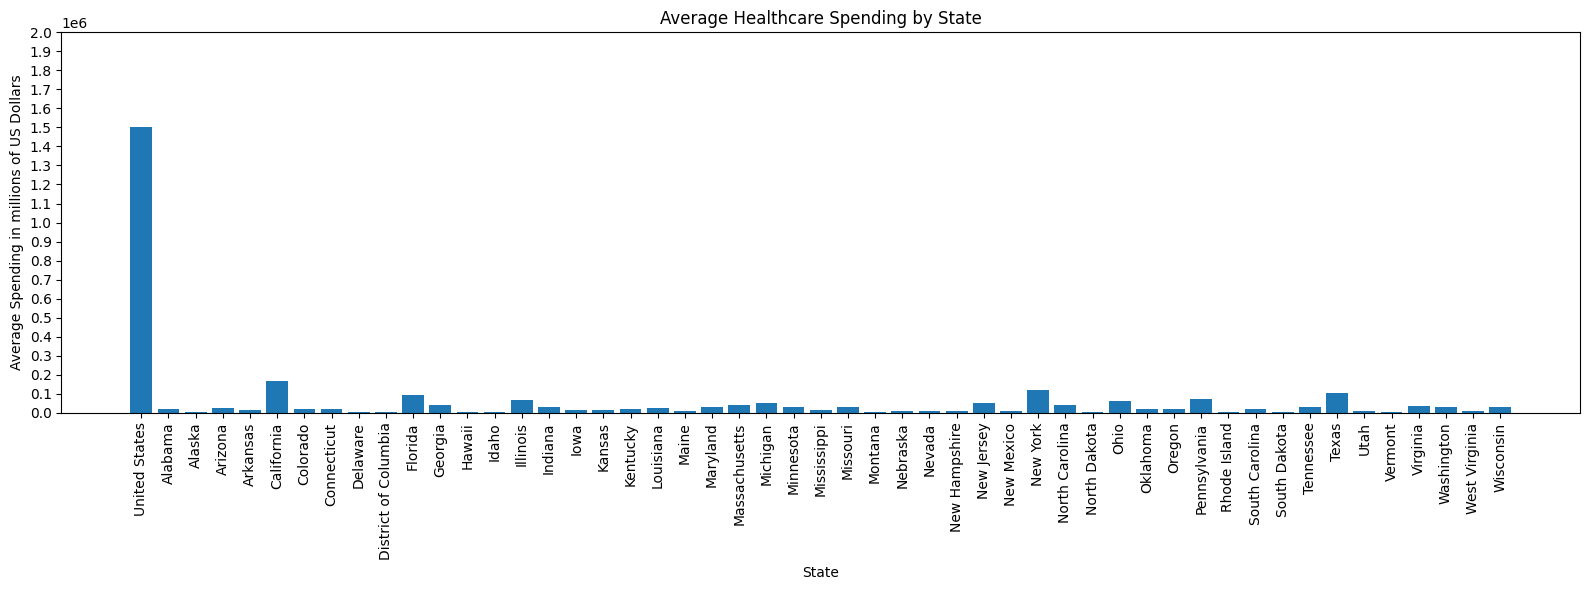

In [16]:
## Create bar plot using matplotlib of average healthcare spending by state
# Calculate average healthcare spending per state
average_spending = healthcare_df.drop('Location', axis=1).mean(axis=1) #drops location column which is non-numerical and calculates mean spending across each row (i.e. state)
healthcare_df['Average Spending'] = average_spending #adds new column to df for average spending values of each state

# creating bar plot
plt.figure(figsize=(16, 6)) # Creates the new figure for plot with dimensions
plt.bar(healthcare_df['Location'], healthcare_df['Average Spending']) # creates bar plot with locations as x-axis and average spending column values as y-axis
plt.title('Average Healthcare Spending by State') # sets title
plt.xlabel('State') #sets x axis label
plt.ylabel('Average Spending in millions of US Dollars') # sets y axis label
plt.xticks(rotation=90) # rotate x-axis labels for clarity
plt.tight_layout() # prevents overlap and helps layout

# Set y-axis limits and ticks
plt.ylim(0, 2000000)  # Set the limits
ax = plt.gca() # grabs current axes making it easier to customize the axes
ax.yaxis.set_major_locator(ticker.MultipleLocator(100000))  # Set ticks every 100000

#show final plot
plt.show()
